## Random variable distributions

#### Import files and load dataset.

In [40]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer

In [2]:
customer_df = pd.read_csv('files_for_lab//we_fn_use_c_marketing_customer_value_analysis.csv')

#### Get the numerical variables from our dataset.

In [3]:
numerical = customer_df.select_dtypes(include = 'number')
print(numerical.columns)

Index(['Customer Lifetime Value', 'Income', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies',
       'Total Claim Amount'],
      dtype='object')


#### Check using a distribution plot if the variables fit the theoretical normal or exponential distribution.


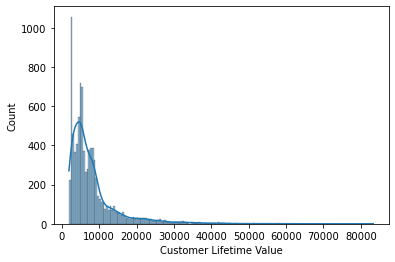

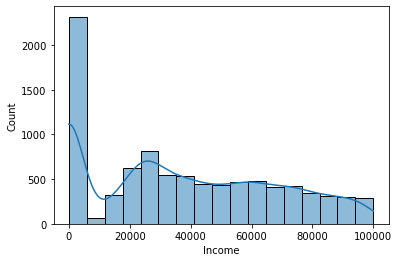

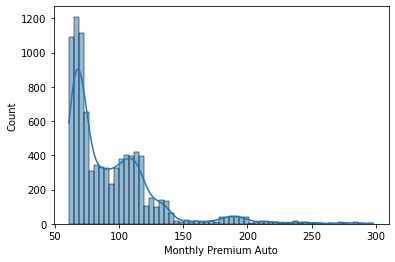

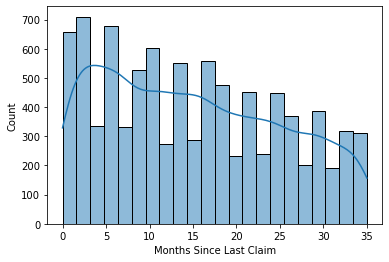

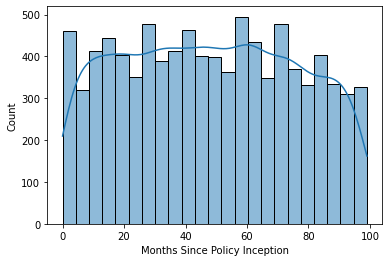

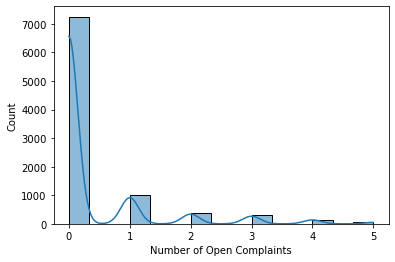

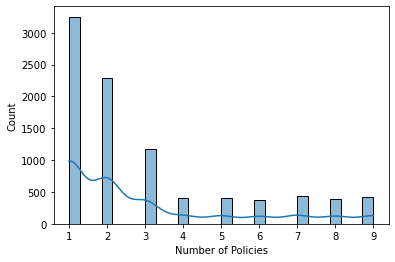

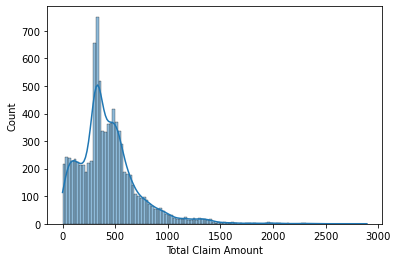

In [16]:
for col in numerical:
    sns.histplot(numerical[col], kde = True)
    plt.show()

From the previous plots, it seems that our data...

- Customer Lifetime Value: does not follow a normal or exponential distribution.
- Income: does not follow a normal or exponential distribution.
- Monthly Premium Auto: does not follow a normal or exponential distribution.
- Months since last claim: does not follow a normal or exponential distribution.
- Months Since Policy Inception: could follow a flat normal distribution.
- Number of Open Complaints: discrete distribution.
- Number of Policies: discrete distribution.
- Total Claim Amount: does not follow a normal or exponential distribution.

#### Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

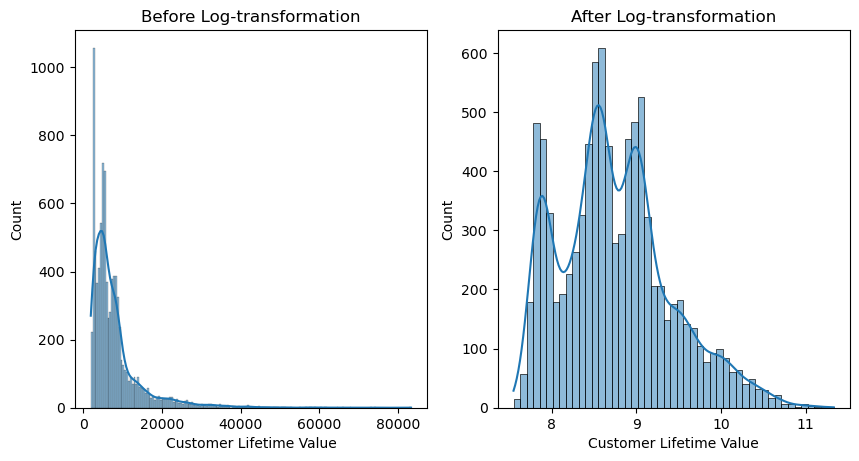

In [21]:
# Log Transformation on Customer Lifetime Value
clv_log = np.log(numerical['Customer Lifetime Value'])

fig, ax = plt.subplots(1, 2, figsize=(10,5), dpi=100)
sns.histplot(x=numerical['Customer Lifetime Value'], kde=True, ax=ax[0])
sns.histplot(x=clv_log, kde=True, ax=ax[1])
ax[0].set_title('Before Log-transformation')
ax[1].set_title('After Log-transformation')
plt.show()

Still not normally distributed, let's try the BoxCox method.

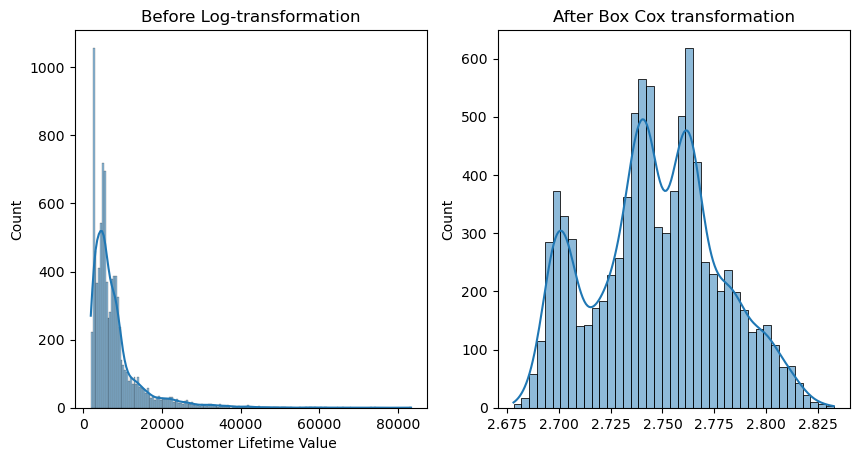

In [33]:
# BoxCox Transformation on Customer Lifetime Value
clv_bxcx = stats.boxcox(numerical['Customer Lifetime Value'])[0] #We don't want the optimal lambda value

fig, ax = plt.subplots(1, 2, figsize=(10,5), dpi=100)
sns.histplot(x=numerical['Customer Lifetime Value'], kde=True, ax=ax[0])
sns.histplot(x=clv_bxcx, kde=True, ax=ax[1])
ax[0].set_title('Before Box Cox transformation')
ax[1].set_title('After Box Cox transformation')
plt.show()

The range of axis x has decreased, but the distribution looks pretty similar to the one accomplished with log transformation. Let's give it another try and apply the Square Root transformation.

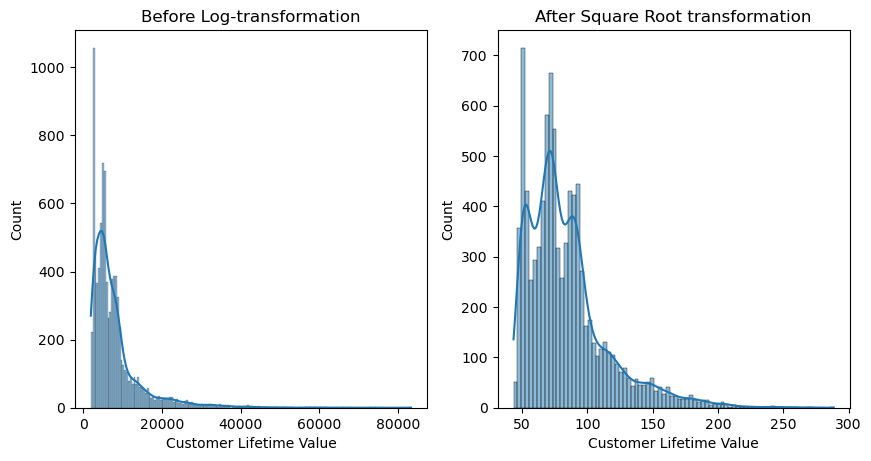

In [34]:
# Square Root Transformation on Customer Lifetime Value
clv_sqrt = np.sqrt(numerical['Customer Lifetime Value'])

fig, ax = plt.subplots(1, 2, figsize=(10,5), dpi=100)
sns.histplot(x=numerical['Customer Lifetime Value'], kde=True, ax=ax[0])
sns.histplot(x=clv_sqrt, kde=True, ax=ax[1])
ax[0].set_title('Before Square Root transformation')
ax[1].set_title('After Square Root transformation')
plt.show()

Distribution still not normal.

count     9134.000000
mean     37657.380009
std      30379.904734
min          0.000000
25%          0.000000
50%      33889.500000
75%      62320.000000
max      99981.000000
Name: Income, dtype: float64


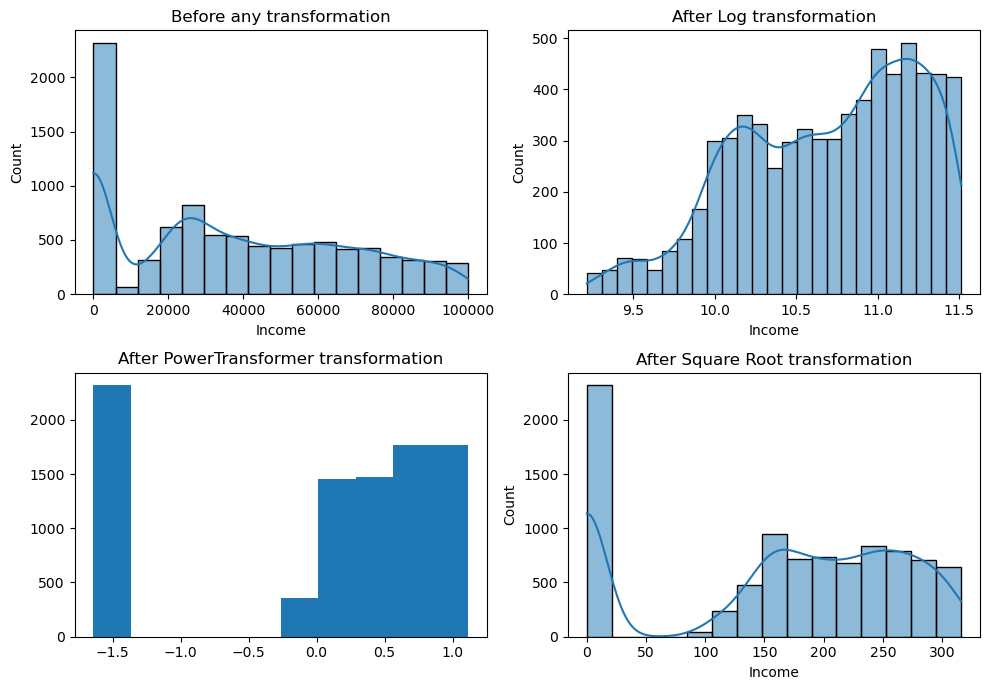

In [82]:
# Log Transformation, boxcox and square root transformation on Income
inc_log = np.log(numerical['Income'])


# Applying PowerTransformer because Income contains value 0
pt = PowerTransformer(method='yeo-johnson')
data = np.array(numerical['Income'])
reshaped_data = np.array(data).reshape(-1, 1)
pt.fit(reshaped_data)
inc_pt = pt.transform(reshaped_data)

# Square Root
inc_sqrt = np.sqrt(numerical['Income'])

# Plotting
fig, ax = plt.subplots(2, 2, figsize = (10,7), dpi = 100)
sns.histplot(x = numerical['Income'], kde=True, ax = ax[0,0])
sns.histplot(x = inc_log, kde=True, ax = ax[0,1])
ax[1,0].hist(x = inc_pt)
sns.histplot(x = inc_sqrt, kde=True, ax = ax[1,1])

ax[0,0].set_title('Before any transformation')
ax[0,1].set_title('After Log transformation')
ax[1,0].set_title('After PowerTransformer transformation')
ax[1,1].set_title('After Square Root transformation')
plt.tight_layout()

plt.show()

Super weird distribution after applying PowerTransformer... And distribution still not normal.

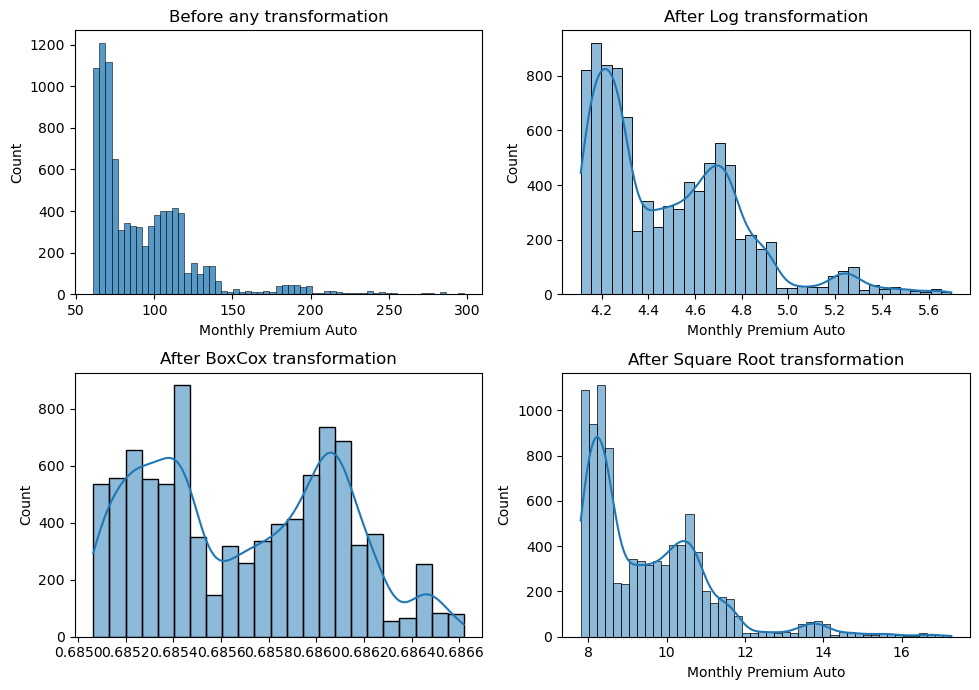

In [79]:
# Log Transformation, boxcox and square root transformation on Monthly Premium Auto
mpa_log = np.log(numerical['Monthly Premium Auto'])
mpa_bxcx = stats.boxcox(numerical['Monthly Premium Auto'])[0]
mpa_sqrt = np.sqrt(numerical['Monthly Premium Auto'])


fig, ax = plt.subplots(2, 2, figsize = (10,7), dpi = 100)
sns.histplot(x = numerical['Monthly Premium Auto'], ax = ax[0,0])
sns.histplot(x = mpa_log, kde=True, ax = ax[0,1])
sns.histplot(x = mpa_bxcx, kde=True, ax = ax[1,0])
sns.histplot(x = mpa_sqrt, kde=True, ax = ax[1,1])

ax[0,0].set_title('Before any transformation')
ax[0,1].set_title('After Log transformation')
ax[1,0].set_title('After BoxCox transformation')
ax[1,1].set_title('After Square Root transformation')
plt.tight_layout()

plt.show()

Distribution still not normal.

C:\Users\ameli\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


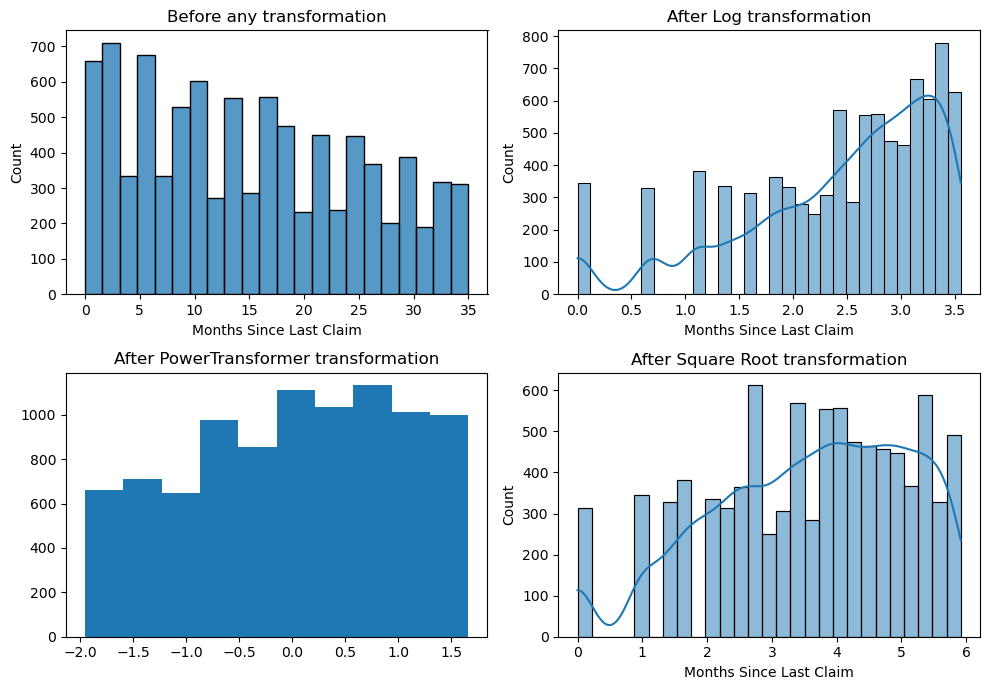

In [84]:
# Log Transformation, boxcox and square root transformation on Months Since Last Claim
mslc_log = np.log(numerical['Months Since Last Claim'])

# Applying PowerTransformer because contains value 0
pt = PowerTransformer(method='yeo-johnson')
data_mslc = np.array(numerical['Months Since Last Claim'])
reshaped_data_mslc = np.array(data_mslc).reshape(-1, 1)
pt.fit(reshaped_data_mslc)
mlsc_pt = pt.transform(reshaped_data_mslc)

#Square Root Transformer
mslc_sqrt = np.sqrt(numerical['Months Since Last Claim'])


fig, ax = plt.subplots(2, 2, figsize = (10,7), dpi = 100)
sns.histplot(x = numerical['Months Since Last Claim'], ax = ax[0,0])
sns.histplot(x = mslc_log, kde=True, ax = ax[0,1])
ax[1,0].hist(x = mlsc_pt)
sns.histplot(x = mslc_sqrt, kde=True, ax = ax[1,1])

ax[0,0].set_title('Before any transformation')
ax[0,1].set_title('After Log transformation')
ax[1,0].set_title('After PowerTransformer transformation')
ax[1,1].set_title('After Square Root transformation')
plt.tight_layout()

plt.show()

The plot showing log transformation resembles a heavily skewed normal distribution.

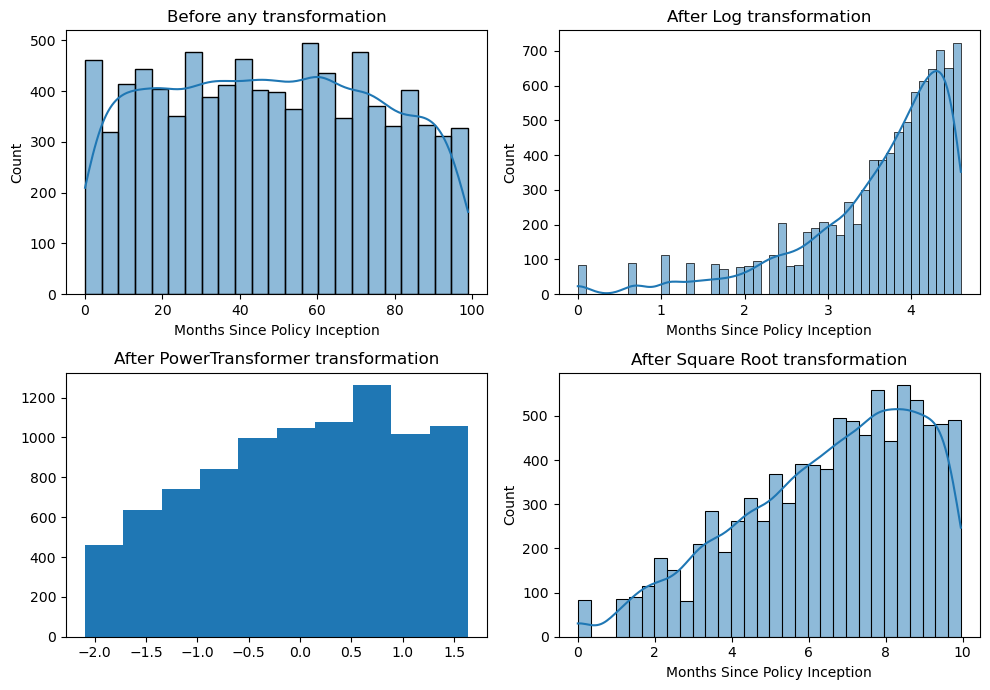

In [86]:
# Log Transformation, boxcox and square root transformation on Months Since Policy Inception
mspl_log = np.log(numerical['Months Since Policy Inception'])

# Applying PowerTransformer because contains value 0
pt = PowerTransformer(method='yeo-johnson')
data_mspl = np.array(numerical['Months Since Policy Inception'])
reshaped_data_mspl = np.array(data_mspl).reshape(-1, 1)
pt.fit(reshaped_data_mspl)
mspl_pt = pt.transform(reshaped_data_mspl)

mspl_sqrt = np.sqrt(numerical['Months Since Policy Inception'])

fig, ax = plt.subplots(2, 2, figsize = (10,7), dpi = 100)
sns.histplot(x = numerical['Months Since Policy Inception'], kde=True, ax = ax[0,0])
sns.histplot(x = mspl_log, kde=True, ax = ax[0,1])
ax[1,0].hist(x = mspl_pt)
sns.histplot(x = mspl_sqrt, kde=True, ax = ax[1,1])

ax[0,0].set_title('Before any transformation')
ax[0,1].set_title('After Log transformation')
ax[1,0].set_title('After PowerTransformer transformation')
ax[1,1].set_title('After Square Root transformation')
plt.tight_layout()

plt.show()

Idem, the plot showing log transformation resembles a heavily skewed normal distribution.

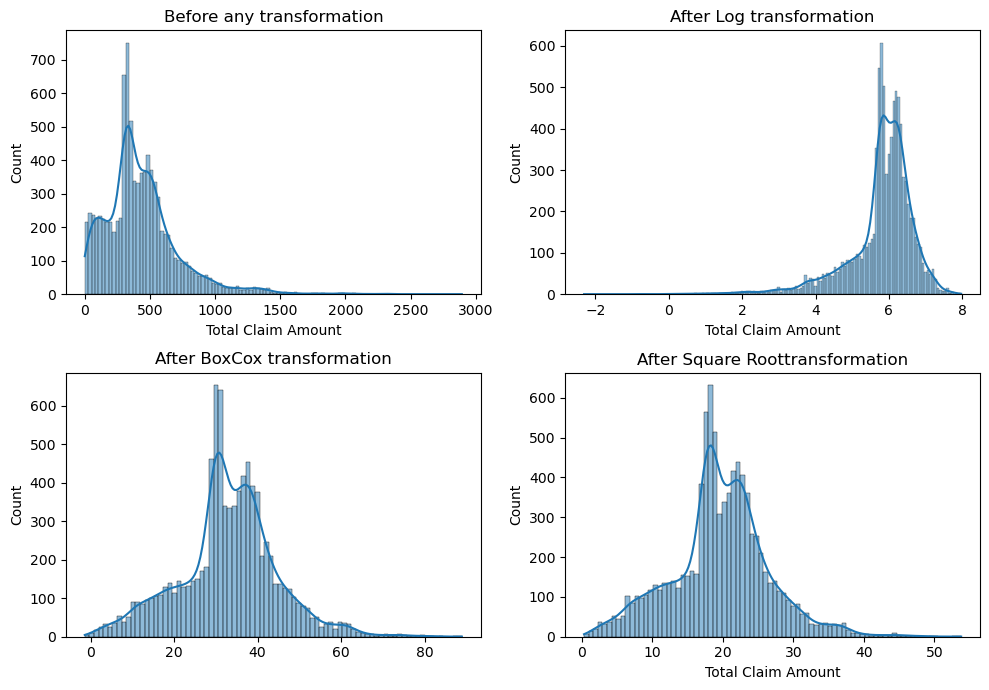

In [38]:
# Log Transformation, boxcox and square root transformation on Total Claim Amount
tca_log = np.log(numerical['Total Claim Amount'])
tca_bxcx = stats.boxcox(numerical['Total Claim Amount'])[0]
tca_sqrt = np.sqrt(numerical['Total Claim Amount'])

fig, ax = plt.subplots(2, 2, figsize = (10,7), dpi = 100)
sns.histplot(x = numerical['Total Claim Amount'], kde=True, ax = ax[0,0])
sns.histplot(x = tca_log, kde=True, ax = ax[0,1])
sns.histplot(x = tca_bxcx, kde=True, ax = ax[1,0])
sns.histplot(x = tca_sqrt, kde=True, ax = ax[1,1])

ax[0,0].set_title('Before any transformation')
ax[0,1].set_title('After Log transformation')
ax[1,0].set_title('After BoxCox transformation')
ax[1,1].set_title('After Square Roottransformation')
plt.tight_layout()

plt.show()

Distribution of transformed data could be considered bimodal.